# K-nearest neighbor

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
df = pd.read_csv('Tumor_Data_Sample.csv')
X = df.iloc[:, 1:-1].values # We are not interested in the first column so we exclude that from X
y = df.iloc[:, -1].values

In [3]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
#X

In [5]:
#y

## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
X_train.shape

(15, 9)

In [9]:
X_test.shape

(4, 9)

## Training the K-nearest neighbor model on the Training set

In [10]:
from sklearn.neighbors import KNeighborsClassifier
#classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric= 'minkowski')
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Making the Confusion Matrix and other metrices

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [12]:
# Predicting the test set result
y_pred = classifier.predict(X_test)


In [13]:
# pos_label must be set to 4 and not the default value 1
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred) )
print("Precision:", precision_score(y_test, y_pred, pos_label=4)) 
print("Recall:", recall_score(y_test, y_pred, pos_label=4))
print("F1 Score:", f1_score(y_test, y_pred, pos_label=4))

Accuracy: 0.75
Confusion matrix:
 [[1 1]
 [0 2]]
Precision: 0.6666666666666666
Recall: 1.0
F1 Score: 0.8


## Making the ROC and calculating the AUC


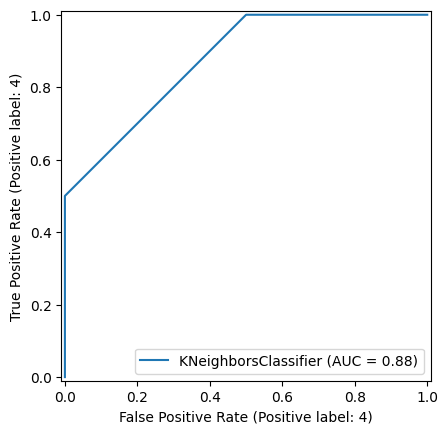

In [14]:
from sklearn.metrics import RocCurveDisplay
classifier_disp = RocCurveDisplay.from_estimator(classifier, X_test, y_test)
plt.show()